<a href="https://colab.research.google.com/github/vivek86-ai/FruitClassification-Kaggle/blob/master/FruitClassification_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Setting google drive as a directory for dataset
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#Directory of dataset
dir_path = "gdrive/My Drive/FruitClassification-Dataset/"

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

Using TensorFlow backend.


In [4]:
#check files in the directory
import os
for dirname,_,filenames in os.walk(dir_path):
  #print(dirname)
  #print(_)
  #print(filenames)
  for filename in filenames:
    print(os.path.join(dir_path,filename))

gdrive/My Drive/FruitClassification-Dataset/apple_68.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_42.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_72.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_48.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_61.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_5.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_2.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_36.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_33.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_10.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_73.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_47.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_37.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_17.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_16.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_53.jpg
gdrive/My Drive/FruitClassification-Dataset/apple_66.jpg
gdrive/My Drive/FruitClassificati

Processing training, appending images in a list 'train_images', appending labels in a list 'train_labels'

In [5]:
train_images = []
train_labels = []
shape = (200,200)

train_path = os.path.join(dir_path, "train")

for filename in os.listdir(train_path):
  if filename.split(".")[1] == 'jpg':
    img = cv2.imread(os.path.join(train_path, filename))

    #Spiliting the filenames and storing the labels in the list
    train_labels.append(filename.split("_")[0])

    #Resize all image to common size
    img = cv2.resize(img, shape)

    train_images.append(img)

In [6]:
print(set(train_labels))

{'apple', 'banana', 'orange', 'mixed'}


Converting labels into One Hot Encoded Sparse Matrix... use .values to convert df into ndarray


In [7]:
train_labels = pd.get_dummies(train_labels).values

In [8]:
#Converting list into ndarray
train_images = np.array(train_images)

In [9]:
#Spliting training data into Train and Validation set
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, random_state=1)

Processing Test Data appending images in a list 'test_images', appending labels in a list 'test_labels'

The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training

In [10]:
test_images = []
test_labels = []
shape = (200,200)

test_path = os.path.join(dir_path, "test")

for filename in os.listdir(test_path):
  if filename.split(".")[1] == "jpg":
    img = cv2.imread(os.path.join(test_path, filename))

    #Spliting the filename and storing the labels 
    test_labels.append(filename.split("_")[0])

    #resize the image
    img = cv2.resize(img, shape)
    test_images.append(img)
    

In [11]:
test_images[0].shape

(200, 200, 3)

In [12]:
#converting test_images to ndarray
test_images = np.array(test_images)

[1 0 0 0]


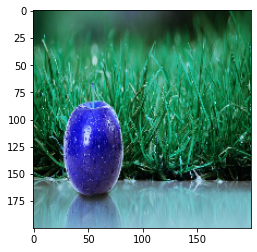

In [13]:
#Visualizing Traing labels
print(train_labels[60])
plt.imshow(train_images[60])

apple


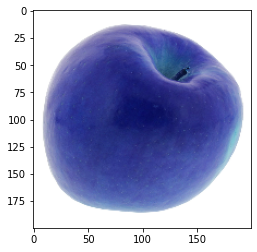

In [14]:
#Visualizing Test Data

print(test_labels[5])
plt.imshow(test_images[5])

In [16]:
#Creating a Sequential Model
model = Sequential()

model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape = (200, 200, 3)))
model.add(Conv2D(kernel_size=(3,3), filters=30, activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(kernel_size=(3,3), filters=30, activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(kernel_size=(3,3), filters=30, activation='tanh'))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4, activation='softmax'))


In [17]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics = ['acc'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 98, 98, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 30)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 98, 30)        120       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 30)       

In [19]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(180, 200, 200, 3)
(60, 200, 200, 3)
(180, 4)
(60, 4)


In [20]:
#Training the model
history = model.fit(x_train, y_train, batch_size=32, epochs = 50, validation_data=(x_val, y_val))

Train on 180 samples, validate on 60 samples
Epoch 1/50
180/180 [==============================] - 9s 53ms/step - loss: 3.8552 - acc: 0.4056 - val_loss: 17.1592 - val_acc: 0.2167
Epoch 2/50
180/180 [==============================] - 0s 3ms/step - loss: 1.2729 - acc: 0.5611 - val_loss: 4.1976 - val_acc: 0.4333
Epoch 3/50
180/180 [==============================] - 0s 3ms/step - loss: 0.7657 - acc: 0.6889 - val_loss: 5.3741 - val_acc: 0.3333
Epoch 4/50
180/180 [==============================] - 0s 3ms/step - loss: 0.4419 - acc: 0.8500 - val_loss: 5.1419 - val_acc: 0.3667
Epoch 5/50
180/180 [==============================] - 0s 3ms/step - loss: 0.3210 - acc: 0.8944 - val_loss: 5.9132 - val_acc: 0.3500
Epoch 6/50
180/180 [==============================] - 0s 3ms/step - loss: 0.4087 - acc: 0.8500 - val_loss: 11.9525 - val_acc: 0.2667
Epoch 7/50
180/180 [==============================] - 0s 3ms/step - loss: 0.6120 - acc: 0.8778 - val_loss: 22.8161 - val_acc: 0.4333
Epoch 8/50
180/180 [=======

In [21]:
#Testing Prediction and actual result
checkImage = test_images[3:4]
checkLabel = test_labels[3:4]

predict = model.predict(np.array(checkImage))

In [22]:
output = {0:'Apple', 1:"Banana", 3:"Mixed", 4:"Orange"}
print("Actual ", checkLabel)
print("Predicted ", output[np.argmax(predict)])

Actual  ['apple']
Predicted  Apple
